# Cost Function


Let's first define a few variables that we will need to use:

- L = total number of layers in the network
- $s_l$ = number of units (not counting bias unit) in layer l
- K = number of output units/classes

Recall that in neural networks, we may have many output nodes. We denote $h_\Theta(x)_k$ as being a hypothesis that results in the $k^{th}$ output. Our cost function for neural networks is going to be a generalization of the one we used for logistic regression. Recall that the cost function for regularized logistic regression was:

$$J(\theta) = - \frac{1}{m} \sum_{i=1}^m [ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$

For neural networks, it is going to be slightly more complicated:

$$\begin{gather*} J(\Theta) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K \left[y^{(i)}_k \log ((h_\Theta (x^{(i)}))_k) + (1 - y^{(i)}_k)\log (1 - (h_\Theta(x^{(i)}))_k)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}} ( \Theta_{j,i}^{(l)})^2\end{gather*}$$

We have added a few nested summations to account for our multiple output nodes. In the first part of the equation, before the square brackets, we have an additional nested summation that loops through the number of output nodes.

In the regularization part, after the square brackets, we must account for multiple theta matrices. The number of columns in our current theta matrix is equal to the number of nodes in our current layer (including the bias unit). The number of rows in our current theta matrix is equal to the number of nodes in the next layer (excluding the bias unit). As before with logistic regression, we square every term.

### Note:
- the double sum simply adds up the logistic regression costs calculated for each cell in the output layer
- the triple sum simply adds up the squares of all the individual Θs in the entire network.
- the i in the triple sum does **not** refer to training example i

# Backpropagation Algorithm

"Backpropagation" is neural-network terminology for minimizing our cost function, just like what we were doing with gradient descent in logistic and linear regression. Our goal is to compute:

$\min_\Theta J(\Theta)$

That is, we want to minimize our cost function $J$ using an optimal set of parameters in theta. In this section we'll look at the equations we use to compute the partial derivative of $J(\Theta)$:


$\dfrac{\partial}{\partial \Theta_{i,j}^{(l)}}J(\Theta)$

To do so, we use the following algorithm:

![](img/40.png)

### Back propagation Algorithm

Given training set $\lbrace (x^{(1)}, y^{(1)}) \cdots (x^{(m)}, y^{(m)})\rbrace$

- Set $ \Delta^{(l)}_{i,j}:= 0$ for all $(l,i,j)$, (hence you end up having a matrix full of zeros)

For training example $t =1$ to $m$:

1.Set $a^{(1)}:=x^{(t)}$

2.Perform forward propagation to compute $a^{(l)}$ for $l=2,3,…,L$
![](img/41.png)
3.Using $y^{(t)}$, compute $\delta^{(L)} = a^{(L)} - y^{(t)}$ 

Where $L$ is our total number of layers and $a^{(L)}$ is the vector of outputs of the activation units for the last layer. So our "error values" for the last layer are simply the differences of our actual results in the last layer and the correct outputs in $y$. To get the delta values of the layers before the last layer, we can use an equation that steps us back from right to left:

4.Compute $\delta^{(L-1)}, \delta^{(L-2)},\dots,\delta^{(2)}$ using $\delta^{(l)} = ((\Theta^{(l)})^T \delta^{(l+1)})\ .*\ a^{(l)}\ .*\ (1 - a^{(l)})$

The delta values of layer l are calculated by multiplying the delta values in the next layer with the theta matrix of layer l. We then element-wise multiply that with a function called g', or g-prime, which is the derivative of the activation function g evaluated with the input values given by $z^{(l)}$.

The g-prime derivative terms can also be written out as:

$g'(z^{(l)}) = a^{(l)}\ .*\ (1 - a^{(l)})$

5.$\Delta^{(l)}_{i,j} := \Delta^{(l)}_{i,j} + a_j^{(l)} \delta_i^{(l+1)}$ or with vectorization, $\Delta^{(l)} := \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T$

Hence we update our new Δ matrix.
- $D^{(l)}_{i,j} := \dfrac{1}{m}\left(\Delta^{(l)}_{i,j} + \lambda\Theta^{(l)}_{i,j}\right)$
- $D^{(l)}_{i,j} := \dfrac{1}{m}\Delta^{(l)}_{i,j}$

The capital-delta matrix D is used as an "accumulator" to add up our values as we go along and eventually compute our partial derivative. Thus we get $\frac \partial {\partial \Theta_{ij}^{(l)}} J(\Theta)$

# Backpropagation Intuition

Recall that the cost function for a neural network is:

$$\begin{gather*}J(\Theta) = - \frac{1}{m} \sum_{t=1}^m\sum_{k=1}^K \left[ y^{(t)}_k \ \log (h_\Theta (x^{(t)}))_k + (1 - y^{(t)}_k)\ \log (1 - h_\Theta(x^{(t)})_k)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_l+1} ( \Theta_{j,i}^{(l)})^2\end{gather*}$$

If we consider simple non-multiclass classification ($k = 1$) and disregard regularization, the cost is computed with:

$$cost(t) =y^{(t)} \ \log (h_\Theta (x^{(t)})) + (1 - y^{(t)})\ \log (1 - h_\Theta(x^{(t)}))$$

Intuitively, $\delta^{(l)}_j$ is the "error" for $a^{(l)}_j$ (unit $j$ in layer $l$). More formally, the delta values are actually the derivative of the cost function:

$\delta_j^{(l)} = \dfrac{\partial}{\partial z_j^{(l)}} cost(t)$

Recall that our derivative is the slope of a line tangent to the cost function, so the steeper the slope the more incorrect we are. Let us consider the following neural network below and see how we could calculate some $\delta_j^{(l)}$:

![](img/42.png)

In the image above, to calculate $\delta_2^{(2)}$, we multiply the weights $\Theta_{12}^{(2)}$ and $\Theta_{22}^{(2)}$ by their respective $\delta$ values found to the right of each edge. So we get $\delta^{(2)}_2 = \Theta_{12}^{(2)}*\delta^{(3)}_1 + \Theta_{22}^{(2)}*\delta^{(3)}_2 $. To calculate every single possible $\delta_j^{(l)}$, we could start from the right of our diagram. We can think of our edges as our $\Theta_{ij}$. Going from right to left, to calculate the value of $\delta_j^{(l)}$, you can just take the over all sum of each weight times the $\delta$ it is coming from. Hence, another example would be $\delta^{(3)}_2 = \Theta_{12}^{(3)}*\delta^{(4)}_1$.

# Implementation Note: Unrolling Parameters

With neural networks, we are working with sets of **matrices**:

$\begin{align*} \Theta^{(1)}, \Theta^{(2)}, \Theta^{(3)}, \dots \newline D^{(1)}, D^{(2)}, D^{(3)}, \dots \end{align*}$

In order to use optimizing functions such as `"fminunc()"`, we will want to "unroll" all the elements and put them into **one long vector**:

`thetaVector = [ Theta1(:); Theta2(:); Theta3(:); ]
deltaVector = [ D1(:); D2(:); D3(:) ]`

If the dimensions of Theta1 is 10x11, Theta2 is 10x11 and Theta3 is 1x11, then we can get back our original matrices from the "unrolled" versions as follows:

`Theta1 = reshape(thetaVector(1:110),10,11)
Theta2 = reshape(thetaVector(111:220),10,11)
Theta3 = reshape(thetaVector(221:231),1,11)`

To summarize:

![](img/43.png)

# Gradient Checking 

เอาไว้ตรวจสอบผลของโปรแกรม `Gradient` แบบ backpropagation (หรืออื่นๆที่ซับซ้อนมากๆ) เนื่องจากแม่งซับซ้อนมาก วิธีนี้จะช่วย debug code ของเราได้อย่างดี

Gradient checking will assure that our backpropagation works as intended. We can approximate the derivative of our cost function with:

$$\dfrac{\partial}{\partial\Theta}J(\Theta) \approx \dfrac{J(\Theta + \epsilon) - J(\Theta - \epsilon)}{2\epsilon}$$

With multiple theta matrices, we can approximate the derivative with respect to $\Theta_j$ as follows:

$$\dfrac{\partial}{\partial\Theta_j}J(\Theta) \approx \dfrac{J(\Theta_1, \dots, \Theta_j + \epsilon, \dots, \Theta_n) - J(\Theta_1, \dots, \Theta_j - \epsilon, \dots, \Theta_n)}{2\epsilon}$$

A small value for ${\epsilon}$ (epsilon) such as ${\epsilon}=10^{−4}$, guarantees that the math works out properly. If the value for ϵ is too small, we can end up with numerical problems.

Hence, we are only adding or subtracting epsilon to the $\Theta_j$ matrix. In octave we can do it as follows:

`epsilon = 1e-4;
for i = 1:n,
  thetaPlus = theta;
  thetaPlus(i) += epsilon;
  thetaMinus = theta;
  thetaMinus(i) -= epsilon;
  gradApprox(i) = (J(thetaPlus) - J(thetaMinus))/(2*epsilon)
end;
`

We previously saw how to calculate the deltaVector. So once we compute our gradApprox vector, we can check that gradApprox ≈ deltaVector.

Once you have verified **once** that your backpropagation algorithm is correct, you don't need to compute gradApprox again. The code to compute gradApprox can be very slow.

ก็คือหลังจาก check ผล ของ backpropagation algorithm เรียบร้อยแล้ว ก็ยกเลิก code ส่วน gradApprox เลย แม่งช้า

# Random Initialization

Initializing all **theta weights to zero does not work with neural networks**. When we backpropagate, all nodes will update to the same value repeatedly. 

Instead we can randomly initialize our weights for our $\Theta$ matrices using the following method:

![](img/44.png)

**Hence, we initialize each $\Theta^{(l)}_{ij}$ to a random value between $[-\epsilon,\epsilon]$. Using the above formula guarantees that we get the desired bound**. The same procedure applies to all the Θ's. Below is some working code you could use to experiment.

`#If the dimensions of Theta1 is 10x11, Theta2 is 10x11 and Theta3 is 1x11.
Theta1 = rand(10,11) * (2 * INIT_EPSILON) - INIT_EPSILON;
Theta2 = rand(10,11) * (2 * INIT_EPSILON) - INIT_EPSILON;
Theta3 = rand(1,11) * (2 * INIT_EPSILON) - INIT_EPSILON;`

rand(x,y) is just a function in octave that will initialize a matrix of random real numbers between 0 and 1.

**(Note: the epsilon used above is unrelated to the epsilon from Gradient Checking)**

# Putting it Together (สรุปขั้นตอนการทำ NN)

First, pick a network architecture; **choose the layout** of your neural network, including **how many hidden units** in each layer and **how many layers** in total you want to have.

- Number of input units = dimension of features $x^{(i)}$ (**รู้อยู่แล้ว**)
- Number of output units = number of classes (**รู้อยู่แล้ว**)
- Number of hidden units per layer = usually more the better (must balance with cost of computation as it increases with more hidden units)
- Defaults: 1 hidden layer. If you have more than 1 hidden layer, then it is recommended that you have the **same number of units in every hidden layer**.
 
### Training a Neural Network

1. Randomly **initialize** the weights
2. Implement **forward propagation** to get $h_\Theta(x^{(i)})$ for any $x^{(i)}$
3. Implement the **cost function**
4. Implement **backpropagation** to compute partial derivatives
5. Use **gradient checking** to confirm that your backpropagation works. Then disable gradient checking.
6. Use **gradient descent** or a **built-in optimization function** to minimize the cost function with the weights in theta.

When we perform forward and back propagation, we loop on every training example:

`
for i = 1:m,
   Perform forward propagation and backpropagation using example (x(i),y(i))
   (Get activations a(l) and delta terms d(l) for l = 2,...,L
`

The following image gives us an intuition of what is happening as we are implementing our neural network:

![](img/45.png)

Ideally, you want $h_\Theta(x^{(i)}) \approx  y^{(i)}$. This will **minimize our cost function**. However, keep in mind that $J(\Theta)$ is **not convex** and thus we can end up in a **local minimum instead**. (ซึ่งเชคได้ว่าจุดนี้น่าจะ global หรือเป็นจุด local ที่ใช้ได้ก็ต้องลอง random initialize ใหม่เรื่อยๆ ดูค่าที่ $h_\Theta(x^{(i)}) \approx  y^{(i)}$ ที่สุด )

# ================= CODE ====================

In [49]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat

data = loadmat('programing/machine-learning-ex4/ex4/ex4data1.mat')

# มีรูปขนาด 20x20 pixel 5000 รูป โดยเก็บสีของแต่ละรูปแบบ gray scale ไว้แต่ละ row ของ X (400 pixel)
# และเก็บผลเฉลยว่ารูปแสดงถึงเลขอะไร (1-10 โดยที่ 10 แทนเลข 0) ไว้ใน y

X = data['X']
y = data['y']

In [53]:
X.shape, y.shape

((5000, 400), (5000, 1))

# แสดง sample รูปบางส่วน

In [54]:
# สุ่มหยิบรูปจาก 5000 รูป เอาแค่ 100
number_of_img = 100
def displayData(img_row,img_number):
    rand_indices = np.random.permutation(len(img_row)) # rand 0-5000
    sample = img_row[rand_indices[0:img_number]] # get sample

    side = img_number**(1/2)
    if (side).is_integer() :
        side = (int)(side)
        space_3d = np.zeros((side*20,side*20))
        for i in range(side):
            row_num = side*i
            for j in range(side):
                space_3d[20*i:20*i+20,j*20:20*j+20] = sample[row_num+j].reshape((20,20)).T

        plt.imshow(space_3d, cmap='gray')
        plt.show()
    else:
        print("Sqrt of number should be integer")

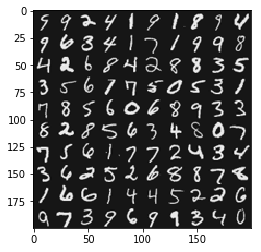

In [55]:
displayData(X,100)

# โจทย์

**ใช้ Neural Network ทำ Classification กับข้อมูลรูป 0-9 ที่มีให้**

#### Hint

จากแบบฝึกข้อที่แล้ว เราได้ลอง feedforword propagation สำหรับ neural networks ไปแล้ว แต่พารามิเตอร์นั้นเราใช้ของที่แบบฝึกหัดหามาให้ ในข้อนี้เราจะหาเองจาก **backpropagation algorithm**

แต่ละรูปที่โจทย์ให้มา มีขนาด 20x20 pixel = 400 pixel โดยแต่ละ pixel ก็คือ ตัวแปรต้น $x_1,x_2,x_3,\cdots,x_{400}$

เมื่อมี sample 5000 รูป เก็บไว้ใน matrix จะได้ $X \in \mathbb{R}^{5000x400}$

$$X = \begin{bmatrix}x_1^{(1)} & x_2^{(1)} & \cdots & x_{400}^{(1)} \newline
x_1^{(2)} & x_2^{(2)} & \cdots & x_{400}^{(2)} \newline
\vdots & \vdots & \cdots & \vdots \newline
x_1^{(5000)} & x_2^{(5000)} & \cdots & x_{400}^{(5000)} \newline
\end{bmatrix}$$

และ $y$ คือ vector ที่เก็บผล label รูปภาพแต่ละรูปไว้ ซึ่งมีค่า 0-9 จะได้ $y \in \mathbb{R}^{5000x1}$

$$y = \begin{bmatrix}0  \newline 0 \newline 1 \newline \vdots  \newline 9 \end{bmatrix}$$

เราจะเริ่มทีละ Step ตามที่เค้าสอนข้างบนดังนี้ 

*ฟังก์ชั่นที่ต้องใช้เสมอ*

In [267]:
def sigmoid(z):  
    g = 1/(1+np.exp(-z))
    return g

## 0 - Pick a network architecture
- เลือกจำนวน hidden layer : ในที่นี้ขอเลือก 1 hidden layer เมื่อรวมกับ input และ output layer จะมีทั้งหมด **3 layer**.
- Number of input units = dimension of features $x^{(i)}$ : ดังนั้นข้อนี้มี 400 unit + 1 bias unit = **401 unit**
- Number of output units = number of classes : ในที่นี้มี output ที่เป็นไปได้คือ 0-9 ดังนั้น มี **10 unit**
- Number of hidden units per layer = usually more the better (ยิ่งเยอะยิ่งดี แต่ก็ทำให้โมเดลซับซ้อนขึ้น) : **25 unit**

สุดท้ายได้รูปประมาณนี้
![](img/46.png)

In [56]:
input_layer_size = 400 # 20x20 Input Images of Digits
hidden_layer_size = 25 # 25 hidden units
num_labels = 10        # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

## 1 - Randomly initialize the weights
สร้างฟังก์ชั่น random ค่า $\Theta$ ตั้งต้นสำหรับ train function

โดย $\Theta^{(l)} \in \mathbb{R}^{(S^{l+1})x(S^{l})}$

เมื่อ $S^{l}$ คือจำนวน unit ที่ layer $l$

จากปัญหาข้อนี้ มีการแปลง 2 ครั้ง ดังนั้นจะมี $\Theta^{(1)}, \Theta^{(2)}$ 

สำหรับการ dev ครั้งแรก ขอ fix ค่า $\Theta^{(1)}, \Theta^{(2)}$  ไว้ก่อน เพื่อตรวจสอบความถูกต้องของ function ดังนั้นจะได้

In [83]:
nn_params = loadmat('programing/machine-learning-ex4/ex4/ex4weights.mat')

# Unrolling nn_params to Vector
ThetaVec1 = nn_params['Theta1'].reshape(-1)
ThetaVec2 = nn_params['Theta2'].reshape(-1)
nn_params = np.concatenate((ThetaVec1,ThetaVec2))

In [220]:
ThetaVec1.shape , ThetaVec2.shape, nn_params.shape

((10025,), (260,), (10285,))

ในส่วนของการใช้งานจริง เราต้อง random ค่า initialize ของ $\Theta$ ก่อนแทนไปใน optimize function ดังนี้

In [261]:
# เมื่อ L_in คือ จำนวน unit ขาเข้า L_out คือ จำนวน unit ขาออก
# อยากให้ค่า Theta ที่ random มานี้ ค่ามากสุดคือ epsilon น้อยสุดคือ -epsilon
def randInitializeWeights(L_in, L_out):
    # Randomly initialize the weights to small values
    epsilon_init = 0.12
    W = np.random.random_sample((L_out,1+L_in))*2*epsilon_init - epsilon_init
    return W

In [262]:
ThetaVecRand1 = randInitializeWeights(400,25).reshape(-1)
ThetaVecRand2 = randInitializeWeights(25,10).reshape(-1)
nn_paramsRand = np.concatenate((ThetaVecRand1,ThetaVecRand2))

In [264]:
ThetaVecRand1.shape , ThetaVecRand2.shape, nn_paramsRand.shape

((10025,), (260,), (10285,))

นำค่าตรงนี้ไปใช้ในการ train จริงๆ

## 2 - Implement forward propagation to get $h_\Theta(x^{(i)})$ for any $x^{(i)}$



หาค่า $z^{(l)}$ $a^{(l)}$ ให้ครบทุก layer เหมือนที่ทำในข้อก่อนหน้า

$\begin{bmatrix}x_0 \newline x_1 \newline x_2 \newline x_3\end{bmatrix}\rightarrow\begin{bmatrix}a_1^{(2)} \newline a_2^{(2)} \newline a_3^{(2)} \newline \end{bmatrix}\rightarrow h_\theta(x)$

$z^{(2)} = \Theta^{(1)}(x + \text{bias unit})$

$a^{(2)} = g(z^{(2)})$

$z^{(3)} = \Theta^{(2)}(a^{(2)} + \text{bias unit})$

$a^{(3)} = g(z^{(3)})$

![](img/42.png)

ใส่ Code ส่วนนี้ลงไปใน Cost Function ข้างล่าง

## 3 - Implement the Cost function (feedforward)

Recall that the cost function for a neural network is:

$$\begin{gather*}J(\Theta) = - \frac{1}{m} \sum_{t=1}^m\sum_{k=1}^K \left[ y^{(t)}_k \ \log (h_\Theta (x^{(t)}))_k + (1 - y^{(t)}_k)\ \log (1 - h_\Theta(x^{(t)})_k)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_l+1} ( \Theta_{j,i}^{(l)})^2\end{gather*}$$

โดยที่ $y^{(t)} = \begin{bmatrix} y^{(t)}_1 \newline y^{(t)}_2 \newline \vdots \newline y^{(t)}_K  \end{bmatrix}$ เมื่อ $K$ คือจำนวน class output ทั้งหมด อย่างในข้อนี้ $K = 10$ ดังนั้น output มีโอกาสเป็นไปได้ทั้งหมด 10 ค่า (vector ที่มีค่าเป็น 0 หรือ 1) ดังนี้

$$y^{(t)} = \begin{bmatrix} 1 \newline 0 \newline 0 \newline \vdots \newline 0 \end{bmatrix} , \begin{bmatrix} 0 \newline 1 \newline 0 \newline \vdots \newline 0 \end{bmatrix}, \cdots or  \begin{bmatrix} 0 \newline 0 \newline 0 \newline \vdots \newline 1 \end{bmatrix} \in \mathbb{R}^{10} $$

ดังนั้นต้องทำ function ที่แปลงค่า $y^{(t)} \in \{0,1,2,\cdots,9\}$ เป็น $y^{(t)} \in \begin{bmatrix} 1 \newline 0 \newline 0 \newline \vdots \newline 0 \end{bmatrix} , \begin{bmatrix} 0 \newline 1 \newline 0 \newline \vdots \newline 0 \end{bmatrix}, \cdots or  \begin{bmatrix} 0 \newline 0 \newline 0 \newline \vdots \newline 1 \end{bmatrix}$ ด้วย

ฟังก์ชั่นแปลง $y$ เช่นจาก เดิม $y^{(t)} = 5$ ก็ต้องแปลงเป็น vector ที่ตำแหน่งที่ 5 เป็น 1 นอกนั้นเป็น 0 หมด ได้ฟังก์ชั่นดังนี้

In [266]:
def createYmat(y,num_labels):
    m = len(y)
    mat = np.zeros((m,num_labels))
    for index in range(len(y)):
        mat[index,y[index]-1] = 1
    return mat

ในส่วนของ 

$$\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_l+1} ( \Theta_{j,i}^{(l)})^2$$

แม่งเหมือนการเอา $\Theta$ ทุก Layer ที่ยกกำลังสองแล้วมารวมกันให้หมด

อย่างในข้อนี้มี $\Theta^{(1)} \in \mathbb{R}^{25x401}$ และ $\Theta^{(2)} \in \mathbb{R}^{10x26}$ โดยที่

$$\Theta^{(1)} = \begin{bmatrix}\Theta_{1,0}^{(1)} & \Theta_{1,1}^{(1)} & \cdots & \Theta_{1,400}^{(1)} \newline
\Theta_{2,0}^{(1)} & \Theta_{2,1}^{(1)} & \cdots & \Theta_{2,400}^{(1)} \newline
\vdots & \vdots & \cdots & \vdots \newline
\Theta_{25,0}^{(1)} & \Theta_{25,1}^{(1)} & \cdots & \Theta_{25,400}^{(1)} \newline
\end{bmatrix} \in \mathbb{R}^{25x401}$$

$$\Theta^{(2)} = \begin{bmatrix}\Theta_{1,0}^{(2)} & \Theta_{1,1}^{(2)} & \cdots & \Theta_{1,25}^{(2)} \newline
\Theta_{2,0}^{(2)} & \Theta_{2,1}^{(2)} & \cdots & \Theta_{2,25}^{(2)} \newline
\vdots & \vdots & \cdots & \vdots \newline
\Theta_{10,0}^{(2)} & \Theta_{10,1}^{(2)} & \cdots & \Theta_{10,25}^{(2)} \newline
\end{bmatrix} \in \mathbb{R}^{10x26}$$

ดังนั้น $\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_l+1} ( \Theta_{j,i}^{(l)})^2$ แม่งคือให้แต่ละค่าใน $\Theta^{(1)},\Theta^{(2)}$ ยกกำลังสองแล้วรวมทุกค่าใน matrix แล้วรวมทุก matrix กัน

จะได้ Cost Function ที่รวมผลของ Regularization ด้วยแล้วดังนี้

In [192]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y,nlambda):
    # Implements the NN cost function for a two layer NN which performs classification
    #   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels,X, y, lambda) 
    #   computes the cost and gradient of the neural network. The
    #   parameters for the neural network are "unrolled" into the vector
    #   nn_params and need to be converted back into the weight matrices. 
 
    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = nn_params[0:hidden_layer_size*(input_layer_size + 1)].reshape((hidden_layer_size,input_layer_size + 1))
    Theta2 = nn_params[hidden_layer_size*(input_layer_size+1):len(nn_params)].reshape((num_labels,(hidden_layer_size + 1)))

    # Setup some useful variables
    m = X.shape[0]
         
    # You need to return the following variables correctly 
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the code by working through the following parts.
    
    # Part 1: Feedforward the neural network and return the cost in the variable J. 
    #         After implementing Part 1, you can verify that your
    #         cost function computation is correct by verifying the cost
    #         computed in ex4.m
    # Part 3: Implement regularization with the cost function and gradients.
    #
    #         Hint: You can implement this around the code for
    #               backpropagation. That is, you can compute the gradients for
    #               the regularization separately and then add them to Theta1_grad
    #               and Theta2_grad from Part 2.
    
    # Part 1 : Feedforward { Theta1(25x401), Theta2(10x26), X(m,401), a2(m,26), h(m,10) }
    # -- Compute h    
    ones_m = np.ones((m,1))     # mx1
    X = np.hstack((ones_m,X))   # mx401
    
    z2 = X.dot(Theta1.T)        # mx25
    a2 = sigmoid(z2)            # mx25
    a2 = np.hstack((ones_m,a2)) # mx26
    
    z3 = a2.dot(Theta2.T)       # mx10
    h  = sigmoid(z3)            # mx10
 
    y = createYmat(y,num_labels)# mx10
    
    left  = np.sum(np.multiply(-y,np.log(h)))
    right = np.sum(np.multiply(-(1-y),np.log(1-h)))
    J = J + (1/m)*(left+right)  # Correct!!!

    # Part 3: Implement regularization to Cost Function
    costReg = (nlambda/(2*m))*(np.sum(np.power(Theta1[:,1:input_layer_size+1],2)) + np.sum(np.power(Theta2[:,1:hidden_layer_size+1],2)))
    J = J + costReg

    return J

ทดสอบค่า J ด้วย Input ที่โจทย์ให้มา (ยังไม่รวม Regularization)

In [195]:
nlambda = 0
nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,nlambda)

0.28762916516131887

ถูกต้องตามเฉลย

ทดสอบค่า J ด้วย Input ที่โจทย์ให้มา (รวม Regularization)

In [196]:
nlambda = 1
nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,nlambda)

0.38376985909092359

ถูกต้องตามเฉลย

## 4 - Compute partial derivatives (backpropagation)

ปกติแล้วเราจะหา gradient ของ cost เพื่อหา $\theta$ ที่ทำให้ $J(\theta)$ มีค่าน้อยที่สุด สมมติว่า $\theta = \begin{bmatrix} \theta_0 \newline \theta_1 \newline \theta_2 \end{bmatrix}$ จะได้ gradient คือ $\dfrac{d}{d\theta}J(\theta) = \begin{bmatrix} \dfrac{\partial}{\partial \theta_{0}}J(\theta) \newline \dfrac{\partial}{\partial \theta_{1}}J(\theta) \newline \dfrac{\partial}{\partial \theta_{2}}J(\theta) \end{bmatrix}$ 

สำหรับปัญหา NN เราจะหา $\min_\Theta J(\Theta)$ เช่นในโจทย์ข้อนี้ เรามี $\Theta^{(1)} \in \mathbb{R}^{25x401}$ และ $\Theta^{(2)} \in \mathbb{R}^{10x26}$ ดังนั้น gradient ของปัญหา NN  ก็จะล้อกับ gradient ของปัญหาข้างบนด้วย กล่าวคือ

$\dfrac{d}{d\Theta}J(\Theta) = \begin{bmatrix} \dfrac{\partial}{\partial \Theta^{(1)}}J(\Theta) \newline \dfrac{\partial}{\partial \Theta^{(2)}}J(\Theta) \end{bmatrix} $

เมื่อ

$\Theta^{(1)} = \begin{bmatrix}\Theta_{1,0}^{(1)} & \Theta_{1,1}^{(1)} & \cdots & \Theta_{1,400}^{(1)} \newline
\Theta_{2,0}^{(1)} & \Theta_{2,1}^{(1)} & \cdots & \Theta_{2,400}^{(1)} \newline
\vdots & \vdots & \cdots & \vdots \newline
\Theta_{25,0}^{(1)} & \Theta_{25,1}^{(1)} & \cdots & \Theta_{25,400}^{(1)} \newline
\end{bmatrix}$ จะได้ $\dfrac{\partial}{\partial \Theta^{(1)}}J(\Theta) = \begin{bmatrix} \dfrac{\partial}{\partial \Theta_{1,0}^{(1)}}J(\Theta) &  \dfrac{\partial}{\partial \Theta_{1,1}^{(1)}}J(\Theta) & \cdots & \dfrac{\partial}{\partial \Theta_{1,400}^{(1)}}J(\Theta) \newline
\dfrac{\partial}{\partial \Theta_{2,0}^{(1)}}J(\Theta) & \dfrac{\partial}{\partial \Theta_{2,1}^{(1)}}J(\Theta) & \cdots & \dfrac{\partial}{\partial \Theta_{2,400}^{(1)}}J(\Theta) \newline
\vdots & \vdots & \cdots & \vdots \newline
\dfrac{\partial}{\partial \Theta_{25,0}^{(1)}}J(\Theta) & \dfrac{\partial}{\partial \Theta_{25,1}^{(1)}}J(\Theta) & \cdots & \dfrac{\partial}{\partial \Theta_{25,400}^{(1)}}J(\Theta) \newline
\end{bmatrix} \in \mathbb{R}^{25x401}$

และ

$\Theta^{(2)} = \begin{bmatrix}\Theta_{1,0}^{(2)} & \Theta_{1,1}^{(2)} & \cdots & \Theta_{1,25}^{(2)} \newline
\Theta_{2,0}^{(2)} & \Theta_{2,1}^{(2)} & \cdots & \Theta_{2,25}^{(2)} \newline
\vdots & \vdots & \cdots & \vdots \newline
\Theta_{10,0}^{(2)} & \Theta_{10,1}^{(2)} & \cdots & \Theta_{10,25}^{(2)} \newline
\end{bmatrix}$ จะได้ $\dfrac{\partial}{\partial \Theta^{(2)}}J(\Theta) = \begin{bmatrix} \dfrac{\partial}{\partial \Theta_{1,0}^{(2)}}J(\Theta) &  \dfrac{\partial}{\partial \Theta_{1,1}^{(2)}}J(\Theta) & \cdots & \dfrac{\partial}{\partial \Theta_{1,25}^{(2)}}J(\Theta) \newline
\dfrac{\partial}{\partial \Theta_{2,0}^{(2)}}J(\Theta) & \dfrac{\partial}{\partial \Theta_{2,1}^{(2)}}J(\Theta) & \cdots & \dfrac{\partial}{\partial \Theta_{2,25}^{(2)}}J(\Theta) \newline
\vdots & \vdots & \cdots & \vdots \newline
\dfrac{\partial}{\partial \Theta_{10,0}^{(2)}}J(\Theta) & \dfrac{\partial}{\partial \Theta_{10,1}^{(2)}}J(\Theta) & \cdots & \dfrac{\partial}{\partial \Theta_{10,25}^{(2)}}J(\Theta) \newline
\end{bmatrix} \in \mathbb{R}^{10x26}$

จะเห็นว่าขนาดของ matrix gradient = ขนาดของ matrix $\Theta$

### backpropagation

กำหนดให้ $\dfrac{\partial}{\partial \Theta_{i,j}^{(l)}}J(\Theta) = D^{(l)}_{ij}$ 

จาก

$D^{(l)}_{ij} = \frac{1}{m}\Delta^{(l)}_{ij}$

$\Delta^{(l)}_{ij} = a^{(l)}_j\delta^{(l+1)}_i$ โดยที่ remove $\delta^{(l)}_0$ ด้วยนะ เช่น `delta2 = delta2(2:end)`

$a^{(l)}_j$ หาได้จากการทำ feedforward ในข้อ 3 ข้างบนแล้ว เมื่อ $j$ คือหมายเลขของแต่ละ unit ที่ layer $l$ 

ที่ layer output :  $l = L$ 

$\delta^{(L)}_{i} = a_{i}^{L}-y_i \in \mathbb{R}^{m \times \text{จำนวน class ของ output}}$

ที่ Hidden Layer : $1 <l < L$

$\delta^{(l)} = (\Theta^{(l)})^T\delta^{l+1}.*g^{'}(z^{(l)}) \in \mathbb{R}^{m \times \text{จำนวนหลักของ}\Theta^{(l)}}$

(ให้คิดว่า $\delta^{(l)}$ เป็น label ของ $a^{(l)}$ และคิดว่า grad เป็น label ของ $\Theta$)

ดังนั้นในการใช้งานจริง เราจะเริ่มจากการ 
- หา $a^{(l)},\delta^{(l)}$ ให้ครบทุก layer ก่อน
- หา $\Delta^{(l)}$
- หา $D^{(l)}$
- ได้ $\dfrac{d}{d\Theta}J(\Theta)$

#### Initial Function

จาก $g^{'}(z) = \frac{d}{dz}g(z) = g(z)(1-g(z))$

เมื่อ $\text{sigmoid}(z) = g(z) = \frac{1}{1+e^{-z}}$

In [269]:
def sigmoidGradient(z):
    gradG = (1/(1+np.exp(-z)))*(1-1/(1+np.exp(-z)))
    return gradG

In [275]:
sigmoidGradient(0)

0.25

In [276]:
sigmoidGradient(np.array([-1,-0.5,0,0.5,1]))

array([ 0.19661193,  0.23500371,  0.25      ,  0.23500371,  0.19661193])

ถูกต้องตามเฉลย

Gradient Function 

In [273]:
def nnGradFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y,nlambda):
    #   The returned parameter grad should be a "unrolled" vector of the
    #   partial derivatives of the neural network.
    
    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = nn_params[0:hidden_layer_size*(input_layer_size + 1)].reshape((hidden_layer_size,input_layer_size + 1))
    Theta2 = nn_params[hidden_layer_size*(input_layer_size+1):len(nn_params)].reshape((num_labels,(hidden_layer_size + 1)))

    # Setup some useful variables
    m = X.shape[0]
         
    # You need to return the following variables correctly 
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    # ====================== YOUR CODE HERE ======================
    # Part 2: Implement the backpropagation algorithm to compute the gradients
    #         Theta1_grad and Theta2_grad. You should return the partial derivatives of
    #         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
    #         Theta2_grad, respectively. After implementing Part 2, you can check
    #         that your implementation is correct by running checkNNGradients
    #
    #         Note: The vector y passed into the function is a vector of labels
    #               containing values from 1..K. You need to map this vector into a 
    #               binary vector of 1's and 0's to be used with the neural network
    #               cost function.
    #
    #         Hint: We recommend implementing backpropagation using a for-loop
    #               over the training examples if you are implementing it for the 
    #               first time.
    #
    # Part 3: Implement regularization with the cost function and gradients.
    #
    #         Hint: You can implement this around the code for
    #               backpropagation. That is, you can compute the gradients for
    #               the regularization separately and then add them to Theta1_grad
    #               and Theta2_grad from Part 2.
    
    # Part 1 : Feedforward { Theta1(25x401), Theta2(10x26), X(m,401), a2(m,26), h(m,10) }
    # -- Compute z2, a2, z3, a3, y   
    ones_m = np.ones((m,1))     # mx1
    X = np.hstack((ones_m,X))   # mx401
    
    z2 = X.dot(Theta1.T)        # mx25
    a2 = sigmoid(z2)            # mx25
    a2 = np.hstack((ones_m,a2)) # mx26
    
    z3 = a2.dot(Theta2.T)       # mx10
    h  = sigmoid(z3)            # mx10
 
    y = createYmat(y,num_labels)# mx10
    
    # Part 2: Implement the backpropagation algorithm
    # --- delta เหมือน label ของ a     
    delta3 = h - y                                           # mx10

    delta2 = delta3.dot(Theta2)                              # [(mx10)x(10x26)] ยังไม่ลบ d20
    delta2 = np.multiply(delta2[:,1:hidden_layer_size+1],sigmoidGradient(z2)) # (mx25).*(mx25) ไม่คิด d20 แล้ว
    
    # --- Delta(สามเหลี่ยม) เหมือน label ของ Theta
    Del2 = (delta3.T).dot(a2)  # (10xm)x(mx26) = 10x26
    Del1 = (delta2.T).dot(X)   # (25xm)x(mx401) = 25x401
    
    Theta1_grad = Theta1_grad + (1/m)*Del1 
    Theta2_grad = Theta2_grad + (1/m)*Del2
    
    # Part 3: Implement regularization with the gradients.
    gradReg1 = np.zeros(Theta1.shape)
    gradReg1 = gradReg1+(nlambda/m)*Theta1
    gradReg1[:,0] = 0
    
    gradReg2 = np.zeros(Theta2.shape)
    gradReg2 = gradReg2+(nlambda/m)*Theta2
    gradReg2[:,0] = 0
    
    Theta1_grad = Theta1_grad + gradReg1 
    Theta2_grad = Theta2_grad + gradReg2
    
    # Unrolling gradients to vector
    Theta1_grad = Theta1_grad.reshape(-1)
    Theta2_grad = Theta2_grad.reshape(-1)
    grad = np.concatenate((Theta1_grad,Theta2_grad))
    
    return grad

In [300]:
nnGradFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y,nlambda).shape

(10285,)

In [308]:
nnGradFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y,nlambda)

array([  6.18712766e-05,  -2.11248326e-12,   4.38829369e-13, ...,
         4.70513145e-05,  -5.01718610e-04,   5.07825789e-04])

ผลไม่ error แต่เรายังไม่รู้ว่าถูกป่าว ต้อง check กับ gradient checking

## 5 - Use gradient checking

ฟังก์ชั่นนี้มีไว้ check ผลของ `nnGradFunction(..)`

จาก
$$f_i(\theta) \approx \frac{J(\theta^{(i+)})-J(\theta^{(-i)})}{2\epsilon}$$

ปกตินิยมให้ $\epsilon = 10^{-4}$

เมื่อ $\theta$ คือ "unrolling" ของ $\Theta$

สร้างฟังก์ชั่นแสดงค่า $J(\theta)$ ก่อน

In [303]:
# theta คือ vector ของ Theta1 + Theta2 = nn_paramsRand
def J(theta):
    return nnCostFunction(theta,input_layer_size,hidden_layer_size,num_labels,X,y,nlambda)

หาค่าประมาณของ Gradient

In [304]:
def computeNumericalGradient(theta):
    # -----------------------
    #COMPUTENUMERICALGRADIENT Computes the gradient using "finite differences"
    #and gives us a numerical estimate of the gradient.
    #   numgrad = COMPUTENUMERICALGRADIENT(J, theta) computes the numerical
    #   gradient of the function J around theta. Calling y = J(theta) should
    #   return the function value at theta.

    # Notes: The following code implements numerical gradient checking, and 
    #        returns the numerical gradient.It sets numgrad(i) to (a numerical 
    #        approximation of) the partial derivative of J with respect to the 
    #        i-th input argument, evaluated at theta. (i.e., numgrad(i) should 
    #        be the (approximately) the partial derivative of J with respect 
    #        to theta(i).)
    #                

    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    
    e = 1e-4
    for p in range(theta.size):
        # Set perturbation vector
        perturb[p] = e
        loss1 = J(theta - perturb)
        loss2 = J(theta + perturb)
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1)/(2*e)
        perturb[p] = 0
 
    return numgrad

In [305]:
computeNumericalGradient(nn_paramsRand)

array([ -2.96928642e-02,   5.79254866e-06,   1.71855863e-06, ...,
         2.38574516e-01,   2.15113962e-01,   2.52127723e-01])

ให้ผลออกมาละ ลองตรวจสอบดูกับข้อมูลจากโจยท์ดูดีกว่า ว่าค่าใกล้เคียงกันจริงหรือเปล่า (น้อยกว่า $10^{-9}$) จะได้

In [311]:
sum(nnGradFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y,nlambda)-computeNumericalGradient(nn_params))

-1.5163089316086244e-09

น้อยกว่า $10^{-9}$ จริงแสดงว่า `nnGradFunction(...)` ถูกแล้ว ไปทำข้อต่อไปได้เลย

## 6 - Use gradient descent or a built-in optimization function


ใช้ optimize function เพื่อ train NN ลองกับ TensorFlow, Scikit-Learn ดู